In [1]:
import zipfile
import os
# Path to the ZIP file
zip_file_path = 'StockData.zip'

In [2]:
# Folder to extract files to
extracted_folder_path = 'extracted_data'

In [3]:
# Extract ZIP file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extracted_folder_path)


In [4]:
# List the extracted files
extracted_files = os.listdir(extracted_folder_path)
print(extracted_files)

['ADANIPORTS.csv', 'ASIANPAINT.csv', 'AXISBANK.csv', 'BAJAJ-AUTO.csv', 'BAJAJFINSV.csv', 'BAJFINANCE.csv', 'BHARTIARTL.csv', 'BPCL.csv', 'BRITANNIA.csv', 'CIPLA.csv', 'COALINDIA.csv', 'DRREDDY.csv', 'EICHERMOT.csv', 'GAIL.csv', 'GRASIM.csv', 'HCLTECH.csv', 'HDFC.csv', 'HDFCBANK.csv', 'HEROMOTOCO.csv', 'HINDALCO.csv', 'HINDUNILVR.csv', 'ICICIBANK.csv', 'INDUSINDBK.csv', 'INFRATEL.csv', 'INFY.csv', 'IOC.csv', 'ITC.csv', 'JSWSTEEL.csv', 'KOTAKBANK.csv', 'LT.csv', 'MARUTI.csv', 'MM.csv', 'NESTLEIND.csv', 'NIFTY50_all.csv', 'NTPC.csv', 'ONGC.csv', 'POWERGRID.csv', 'RELIANCE.csv', 'SBIN.csv', 'SHREECEM.csv', 'stock_metadata.csv', 'SUNPHARMA.csv', 'TATAMOTORS.csv', 'TATASTEEL.csv', 'TCS.csv', 'TECHM.csv', 'TITAN.csv', 'ULTRACEMCO.csv', 'UPL.csv', 'VEDL.csv', 'WIPRO.csv', 'ZEEL.csv']


# 1.Analyze the indicators in the dataset that best explain the volatility and unpredictable nature of the stocks in the last decade.

In [6]:
sorted_correlation = dict(sorted(correlation_analysis.items(), key=lambda item: item[1]))
print("\nStocks with Highest Negative Correlation between Closing Price and Volume (Last Decade):")
for stock_name, correlation in list(sorted_correlation.items())[:5]:
    print(f"{stock_name}: {correlation}")
# Check if the directory exists, and if not, create it
data_dir = 'StockData'  # Specify the directory name
if not os.path.exists(data_dir):
    os.makedirs(data_dir)  # Create the directory if it doesn't exist

# Get the list of CSV files in the data directory
data_files = [os.path.join(data_dir, f) for f in os.listdir(data_dir) if f.endswith('.csv')]


stock_data = {}
for file in data_files:
    stock_name = file.split('/')[-1].split('.')[0]
    stock_data[stock_name] = pd.read_csv(file)
# Analyze the indicators in the dataset that best explain the volatility and
# unpredictable nature of the stocks in the last decade.


# Assuming 'stock_data' is a dictionary where keys are stock names and values are DataFrames
# containing historical stock data

volatility_indicators = {}
for stock_name, df in stock_data.items():
    if 'Close' in df.columns:
        try:
            # Convert the index to datetime objects for proper slicing
            df.index = pd.to_datetime(df['Date'])
            # Calculate volatility metrics for the last decade
            last_decade_data = df['2013-01-01':]
            if not last_decade_data.empty:  # Check if the DataFrame is not empty
                # Calculate daily returns
                last_decade_data['Daily_Return'] = last_decade_data['Close'].pct_change()
                # Calculate standard deviation of daily returns (a measure of volatility)
                volatility = last_decade_data['Daily_Return'].std()
                # Calculate average daily range (High - Low)
                avg_daily_range = (last_decade_data['High'] - last_decade_data['Low']).mean()
                # Calculate the number of days with significant price changes (e.g., > 5%)
                significant_price_change_days = len(
                    last_decade_data[abs(last_decade_data['Daily_Return']) > 0.05]
                )

                volatility_indicators[stock_name] = {
                    'Volatility': volatility,
                    'Avg_Daily_Range': avg_daily_range,
                    'Significant_Price_Change_Days': significant_price_change_days,
                }
            else:
                print(f"No data available for {stock_name} in the last decade.")
        except KeyError as e:
            print(f"Error calculating volatility indicators for {stock_name}: {e}")

# Analyze the indicators
volatility_df = pd.DataFrame(volatility_indicators).transpose()
# Find stocks with highest volatility
highest_volatility_stocks = volatility_df.sort_values('Volatility', ascending=False).head(10)
# Find stocks with highest average daily range
highest_avg_range_stocks = volatility_df.sort_values('Avg_Daily_Range', ascending=False).head(10)
# Find stocks with the most significant price change days
highest_significant_change_stocks = volatility_df.sort_values(
    'Significant_Price_Change_Days', ascending=False).head(10)

print("Stocks with Highest Volatility (Last Decade):")
print(highest_volatility_stocks)
print("\nStocks with Highest Average Daily Range (Last Decade):")
print(highest_avg_range_stocks)
print("\nStocks with Most Significant Price Change Days (Last Decade):")
highest_significant_change_stocks

# You can further analyze the indicators by:
# - Looking at the correlation between volatility and other factors (e.g., volume, market sentiment)
# - Identifying patterns in the volatility of specific stocks over time
# - Using statistical models to predict future volatility


Stocks with Highest Negative Correlation between Closing Price and Volume (Last Decade):


C:\Users\hp\AppData\Local\Temp\ipykernel_12828\1954279203.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  last_decade_data['Daily_Return'] = last_decade_data['Close'].pct_change()
C:\Users\hp\AppData\Local\Temp\ipykernel_12828\1954279203.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  last_decade_data['Daily_Return'] = last_decade_data['Close'].pct_change()
C:\Users\hp\AppData\Local\Temp\ipykernel_12828\1954279203.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fro

No data available for StockData\INFRATEL in the last decade.


C:\Users\hp\AppData\Local\Temp\ipykernel_12828\1954279203.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  last_decade_data['Daily_Return'] = last_decade_data['Close'].pct_change()
C:\Users\hp\AppData\Local\Temp\ipykernel_12828\1954279203.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  last_decade_data['Daily_Return'] = last_decade_data['Close'].pct_change()
C:\Users\hp\AppData\Local\Temp\ipykernel_12828\1954279203.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fro

Stocks with Highest Volatility (Last Decade):
                       Volatility  Avg_Daily_Range  \
StockData\NIFTY50_all    0.096102        53.099404   
StockData\BAJFINANCE     0.031676       102.620340   
StockData\JSWSTEEL       0.030539        20.954223   
StockData\SBIN           0.030180        18.369126   
StockData\AXISBANK       0.029421        20.819563   
StockData\EICHERMOT      0.029279       477.944709   
StockData\VEDL           0.028904         6.810097   
StockData\ICICIBANK      0.028395        14.694248   
StockData\ZEEL           0.027314        12.097743   
StockData\BPCL           0.027160        16.714709   

                       Significant_Price_Change_Days  
StockData\NIFTY50_all                         2804.0  
StockData\BAJFINANCE                           106.0  
StockData\JSWSTEEL                              71.0  
StockData\SBIN                                  72.0  
StockData\AXISBANK                              75.0  
StockData\EICHERMOT          

,Volatility,Avg_Daily_Range,Significant_Price_Change_Days
StockData\NIFTY50_all,0.096102,53.099404,2804.0
StockData\VEDL,0.028904,6.810097,133.0
StockData\TATAMOTORS,0.027069,10.180947,118.0
StockData\ZEEL,0.027314,12.097743,116.0
StockData\HINDALCO,0.026181,5.946820,116.0
StockData\BAJFINANCE,0.031676,102.620340,106.0
StockData\INDUSINDBK,0.026879,29.618058,103.0
StockData\TATASTEEL,0.024237,13.905340,101.0
StockData\ADANIPORTS,0.024111,10.587864,98.0
StockData\UPL,0.025019,16.768568,92.0


In [8]:
import pandas as pd
import numpy as np
# Further analysis (Example: Correlation with other indicators)
correlation_analysis = {}
for stock_name, df in stock_data.items():
    if 'Close' in df.columns and 'Volume' in df.columns:  # Check if both columns exist
        try:
            # Convert the index to datetime objects for proper slicing
            df.index = pd.to_datetime(df['Date'])
            last_decade_data = df['2013-01-01':]
            if not last_decade_data.empty:  # Check if the DataFrame is not empty
                correlation_analysis[stock_name] = last_decade_data['Close'].corr(
                    last_decade_data['Volume']
                )
            else:
                print(f"No data available for {stock_name} in the last decade.")
        except KeyError as e:  # Aligned with 'try' to define exception handling scope
            print(f"Error calculating correlation for {stock_name}: {e}")

# Print stocks with highest positive and negative correlations
if correlation_analysis:
    sorted_correlation = dict(
        sorted(correlation_analysis.items(), key=lambda item: item[1], reverse=True)
    )
    print(
        "\nStocks with Highest Positive Correlation between Closing Price and Volume (Last Decade):"
    )
    for stock_name, correlation in list(sorted_correlation.items())[:5]:
        print(f"{stock_name}: {correlation}")

    sorted_correlation = dict(sorted(correlation_analysis.items(), key=lambda item: item[1]))
    print(
        "\nStocks with Highest Negative Correlation between Closing Price and Volume (Last Decade):"
    )
    for stock_name, correlation in list(sorted_correlation.items())[:5]:
        print(f"{stock_name}: {correlation}")

No data available for StockData\INFRATEL in the last decade.

Stocks with Highest Positive Correlation between Closing Price and Volume (Last Decade):
StockData\RELIANCE: 0.5364583104923432
StockData\BHARTIARTL: 0.45401011105762024
StockData\NESTLEIND: 0.45393116713386755
StockData\ADANIPORTS: 0.43228508540192306
StockData\BAJAJFINSV: 0.4199782496597032

Stocks with Highest Negative Correlation between Closing Price and Volume (Last Decade):
StockData\GAIL: -0.6210661835640584
StockData\MM: -0.5884250161388693
StockData\GRASIM: -0.5675117472810003
StockData\JSWSTEEL: -0.5412469393862488
StockData\IOC: -0.5340809438977856


# 2.Choose promising stock based on your analysis for your portfolio

In [10]:
#Choose promising stock based on your analysis for your portfolio
promising_stocks = highest_volatility_stocks.head(3)  # Choose top 3 stocks with highest volatility
print("\nPromising Stocks Based on Volatility:")
promising_stocks


Promising Stocks Based on Volatility:


,Volatility,Avg_Daily_Range,Significant_Price_Change_Days
StockData\NIFTY50_all,0.096102,53.099404,2804.0
StockData\BAJFINANCE,0.031676,102.620340,106.0
StockData\JSWSTEEL,0.030539,20.954223,71.0


# 3.Build a dashboard where you can analyze the performance of the stocks

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
Date,,,,,,,,,,,,,,,
2007-11-27,2007-11-27,MUNDRAPORT,EQ,440.00,770.00,1050.00,770.0,959.0,962.90,984.72,27294366,2.687719e+15,NaN,9859619,0.3612
2007-11-28,2007-11-28,MUNDRAPORT,EQ,962.90,984.00,990.00,874.0,885.0,893.90,941.38,4581338,4.312765e+14,NaN,1453278,0.3172
2007-11-29,2007-11-29,MUNDRAPORT,EQ,893.90,909.00,914.75,841.0,887.0,884.20,888.09,5124121,4.550658e+14,NaN,1069678,0.2088
2007-11-30,2007-11-30,MUNDRAPORT,EQ,884.20,890.00,958.00,890.0,929.0,921.55,929.17,4609762,4.283257e+14,NaN,1260913,0.2735
2007-12-03,2007-12-03,MUNDRAPORT,EQ,921.55,939.75,995.00,922.0,980.0,969.30,965.65,2977470,2.875200e+14,NaN,816123,0.2741


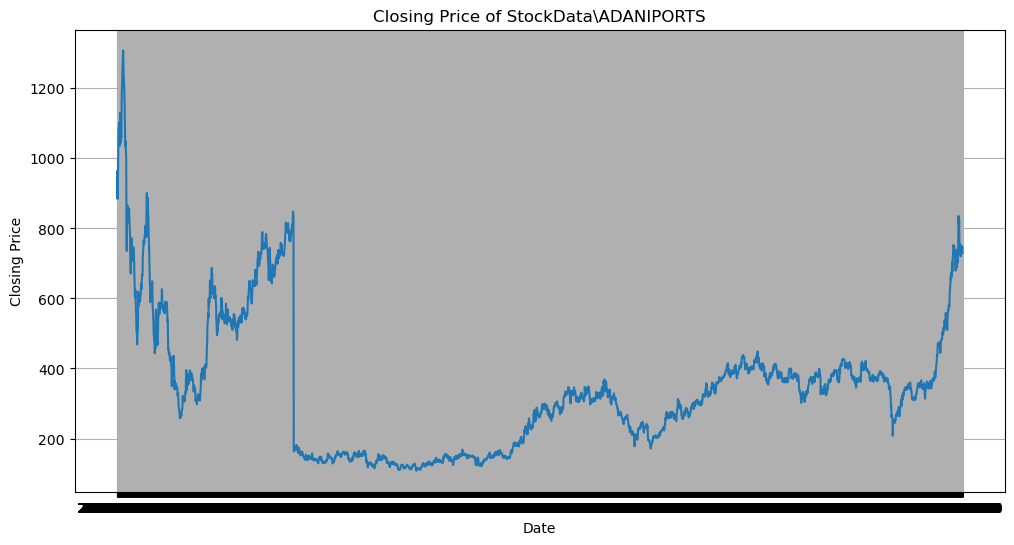


Volatility Indicators for StockData\ADANIPORTS:
Volatility                        0.024111
Avg_Daily_Range                  10.587864
Significant_Price_Change_Days    98.000000
Name: StockData\ADANIPORTS, dtype: float64


In [11]:
#Build a dashboard where you can analyze the performance of the stocks
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display, clear_output
# Function to update the dashboard based on selected stock
def update_dashboard(change):
    selected_stock = stock_dropdown.value
    if selected_stock in stock_data:
        df = stock_data[selected_stock]
        # Clear the output area
        clear_output(wait=True)
        # Display the selected stock's data
        display(df.head())

        # Plot the closing price of the selected stock
        plt.figure(figsize=(12, 6))
        plt.plot(df['Date'], df['Close'])
        plt.title(f"Closing Price of {selected_stock}")
        plt.xlabel("Date")
        plt.ylabel("Closing Price")
        plt.grid(True)
        plt.show()

        # Further analysis based on selected stock (e.g., volatility, correlations)
        # You can add more plots or calculations here based on the selected stock

        # Print volatility indicators for the selected stock
        if selected_stock in volatility_df.index:
            print(f"\nVolatility Indicators for {selected_stock}:")
            print(volatility_df.loc[selected_stock])
    else:
        clear_output(wait=True)
        print("Stock data not found.")


# Create a dropdown widget for selecting stocks
stock_dropdown = widgets.Dropdown(
    options=list(stock_data.keys()),
    value=list(stock_data.keys())[0],  # Set default value to the first stock
    description='Select Stock:',
)

# Observe changes in the dropdown and update the dashboard
stock_dropdown.observe(update_dashboard, names='value')

# Display the dropdown and initial dashboard content
display(stock_dropdown)
update_dashboard(None)  # Initial update for the default stock

# 4.Feature engineer and build machine learning solutions for the business Requirements. 

In [26]:
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display, clear_output
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [27]:
#Feature engineer and build machine learning solutions for the business Requirements.
# Feature Engineering: Create new features based on existing data
for stock_name, df in stock_data.items():
    if 'Close' in df.columns:
        try:
            df.index = pd.to_datetime(df['Date'])
            df['SMA_50'] = df['Close'].rolling(window=50).mean()  # 50-day Simple Moving Average
            df['SMA_200'] = df['Close'].rolling(window=200).mean()  # 200-day Simple Moving Average
            df['RSI'] = calculate_rsi(df['Close'])  # Relative Strength Index (RSI)
            df['MACD'], df['Signal_Line'] = calculate_macd(df['Close'])  # MACD and Signal Line
            # Add more features as needed (e.g., Bollinger Bands, Volume Weighted Average Price)
        except Exception as e:
            print(f"Error calculating features for {stock_name}: {e}")

In [28]:
X = df[['SMA_50', 'SMA_200', 'RSI', 'MACD']]  # Features
y = df['Close']  # Target
X = X.dropna() 
y = y[X.index]  # Align y with updated X

In [30]:
# Functions to calculate technical indicators (RSI, MACD)
def calculate_rsi(close_prices, window=14):
    delta = close_prices.diff()
    gain = delta.where(delta > 0, 0)
    loss = -delta.where(delta < 0, 0)
    avg_gain = gain.rolling(window=window).mean()
    avg_loss = loss.rolling(window=window).mean()
    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))
    return rsi


def calculate_macd(close_prices, short_window=12, long_window=26, signal_window=9):
    short_ema = close_prices.ewm(span=short_window, adjust=False).mean()
    long_ema = close_prices.ewm(span=long_window, adjust=False).mean()
    macd_line = short_ema - long_ema
    signal_line = macd_line.ewm(span=signal_window, adjust=False).mean()
    return macd_line, signal_line



# Machine Learning Model Building

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Example: Predict future closing price using linear regression

for stock_name, df in stock_data.items():
    if 'Close' in df.columns and 'SMA_50' in df.columns and 'SMA_200' in df.columns and 'RSI' in df.columns and 'MACD' in df.columns:
        try:
            # Prepare data for model training
            X = df[['SMA_50', 'SMA_200', 'RSI', 'MACD']]  # Features (Independent variables)
            y = df['Close']  # Target variable (Dependent variable)
            X.dropna(inplace=True)
            y = y[X.index]

            # Split data into training and testing sets
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

            # Train a linear regression model
            model = LinearRegression()
            model.fit(X_train, y_train)

            # Make predictions on the test set
            y_pred = model.predict(X_test)

            # Evaluate the model
            rmse = np.sqrt(mean_squared_error(y_test, y_pred))
            print(f"Stock: {stock_name}, RMSE: {rmse}")

            # You can try different models (e.g., RandomForestRegressor) and tune hyperparameters
            # for better performance.

        except Exception as e:
            print(f"Error building model for {stock_name}: {e}")

C:\Users\hp\AppData\Local\Temp\ipykernel_12828\76775783.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.dropna(inplace=True)
C:\Users\hp\AppData\Local\Temp\ipykernel_12828\76775783.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.dropna(inplace=True)
C:\Users\hp\AppData\Local\Temp\ipykernel_12828\76775783.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.dropna(inplace=True)
C:\Users\hp\AppData\Local\Temp\ipykernel_12

Stock: StockData\ADANIPORTS, RMSE: 21.793501705389257
Stock: StockData\ASIANPAINT, RMSE: 84.00890394174455
Stock: StockData\AXISBANK, RMSE: 21.34379898670107
Stock: StockData\BAJAJ-AUTO, RMSE: 68.12976921506599
Stock: StockData\BAJAJFINSV, RMSE: 97.1456323745054
Stock: StockData\BAJFINANCE, RMSE: 95.65284933705507
Stock: StockData\BHARTIARTL, RMSE: 11.310918653078883
Stock: StockData\BPCL, RMSE: 16.270543954903303
Stock: StockData\BRITANNIA, RMSE: 52.53397233868376
Stock: StockData\CIPLA, RMSE: 28.511253097322534
Stock: StockData\COALINDIA, RMSE: 5.011392840651991
Stock: StockData\DRREDDY, RMSE: 47.69873600530287


C:\Users\hp\AppData\Local\Temp\ipykernel_12828\76775783.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.dropna(inplace=True)
C:\Users\hp\AppData\Local\Temp\ipykernel_12828\76775783.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.dropna(inplace=True)
C:\Users\hp\AppData\Local\Temp\ipykernel_12828\76775783.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.dropna(inplace=True)
C:\Users\hp\AppData\Local\Temp\ipykernel_12

Stock: StockData\EICHERMOT, RMSE: 319.8351382157562
Stock: StockData\GAIL, RMSE: 7.841408380820457
Stock: StockData\GRASIM, RMSE: 119.27698724874685
Stock: StockData\HCLTECH, RMSE: 22.736122909955743
Stock: StockData\HDFC, RMSE: 41.206449090642224
Stock: StockData\HDFCBANK, RMSE: 27.622303634247427
Stock: StockData\HEROMOTOCO, RMSE: 35.227273641281464
Stock: StockData\HINDALCO, RMSE: 31.497615150580526
Stock: StockData\HINDUNILVR, RMSE: 13.833909106979968
Stock: StockData\ICICIBANK, RMSE: 23.001695509576393
Stock: StockData\INDUSINDBK, RMSE: 17.088146451138996
Error building model for StockData\INFRATEL: With n_samples=0, test_size=0.2 and train_size=None, the resulting train set will be empty. Adjust any of the aforementioned parameters.
Stock: StockData\INFY, RMSE: 90.98234189739031


C:\Users\hp\AppData\Local\Temp\ipykernel_12828\76775783.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.dropna(inplace=True)
C:\Users\hp\AppData\Local\Temp\ipykernel_12828\76775783.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.dropna(inplace=True)
C:\Users\hp\AppData\Local\Temp\ipykernel_12828\76775783.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.dropna(inplace=True)
C:\Users\hp\AppData\Local\Temp\ipykernel_12

Stock: StockData\IOC, RMSE: 13.008192678515062
Stock: StockData\ITC, RMSE: 16.479521026902315
Stock: StockData\JSWSTEEL, RMSE: 47.026940649571266
Stock: StockData\KOTAKBANK, RMSE: 23.637109135048327
Stock: StockData\LT, RMSE: 50.36344958473759
Stock: StockData\MARUTI, RMSE: 75.02408901488589
Stock: StockData\MM, RMSE: 20.921006925252705
Stock: StockData\NESTLEIND, RMSE: 159.95939904147443


C:\Users\hp\AppData\Local\Temp\ipykernel_12828\76775783.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.dropna(inplace=True)


Error building model for StockData\NIFTY50_all: Found input variables with inconsistent numbers of samples: [234993, 10620219]
Stock: StockData\NTPC, RMSE: 3.22012702333357
Stock: StockData\ONGC, RMSE: 24.787584798287273
Stock: StockData\POWERGRID, RMSE: 2.2856545472212524
Stock: StockData\RELIANCE, RMSE: 35.302365494557755
Stock: StockData\SBIN, RMSE: 54.35424612811083
Stock: StockData\SHREECEM, RMSE: 222.1542221869844
Stock: StockData\SUNPHARMA, RMSE: 29.058505768537565
Stock: StockData\TATAMOTORS, RMSE: 21.782654648702543
Stock: StockData\TATASTEEL, RMSE: 12.446445778280433
Stock: StockData\TCS, RMSE: 38.29009346341021
Stock: StockData\TECHM, RMSE: 39.69894831353993


C:\Users\hp\AppData\Local\Temp\ipykernel_12828\76775783.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.dropna(inplace=True)
C:\Users\hp\AppData\Local\Temp\ipykernel_12828\76775783.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.dropna(inplace=True)
C:\Users\hp\AppData\Local\Temp\ipykernel_12828\76775783.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.dropna(inplace=True)
C:\Users\hp\AppData\Local\Temp\ipykernel_12

Stock: StockData\TITAN, RMSE: 50.35091159308563
Stock: StockData\ULTRACEMCO, RMSE: 53.24007636284387
Stock: StockData\UPL, RMSE: 13.38447812167744
Stock: StockData\VEDL, RMSE: 41.901655519727186
Stock: StockData\WIPRO, RMSE: 36.170475379298836
Stock: StockData\ZEEL, RMSE: 7.031341723925554


C:\Users\hp\AppData\Local\Temp\ipykernel_12828\76775783.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.dropna(inplace=True)
C:\Users\hp\AppData\Local\Temp\ipykernel_12828\76775783.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.dropna(inplace=True)
C:\Users\hp\AppData\Local\Temp\ipykernel_12828\76775783.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.dropna(inplace=True)
C:\Users\hp\AppData\Local\Temp\ipykernel_12